# Titanic: Machine Learning from Disaster



The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Load Libraries 


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [53]:
df=pd.read_csv('train.csv')

In [54]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Exploring Target variable

Survived column indicates whether person has survived the crash or not. This is the target variable we wish to predict.
As we know there are only two possible outcomes i.e either person survived marked as '1' or didnt survive marked as '0'. Lets see percentage of people survived the crash



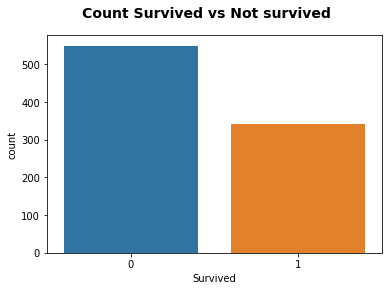

In [56]:
fig = plt.figure()
fig.suptitle('Count Survived vs Not survived ', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
sns.countplot(df.Survived)
plt.show()

### Counts of survived By Gender

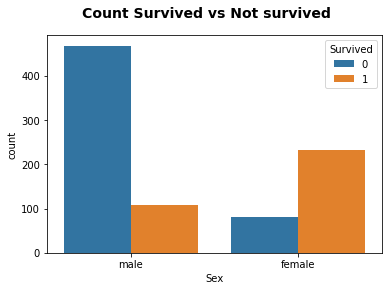

In [57]:

fig = plt.figure()
fig.suptitle('Count Survived vs Not survived ', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
sns.countplot(df.Sex,hue=df.Survived)
plt.show()

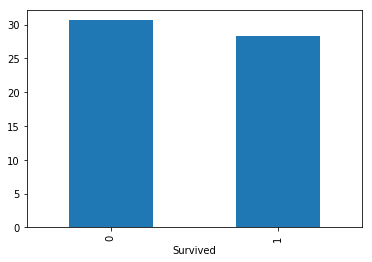

In [58]:
df.groupby(['Survived'])['Age'].mean().plot.bar()

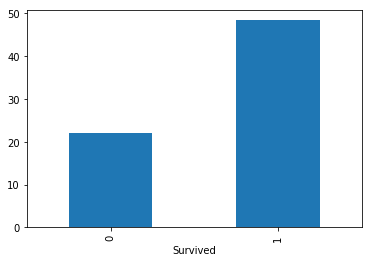

In [59]:
df.groupby(['Survived'])['Fare'].mean().plot.bar()

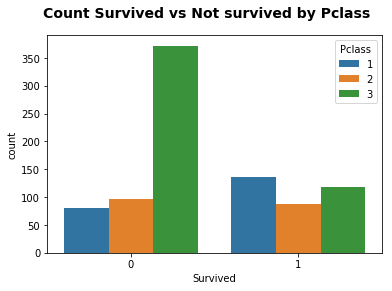

In [60]:

fig = plt.figure()
fig.suptitle('Count Survived vs Not survived by Pclass ', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
sns.countplot(df.Survived,hue=df.Pclass)
plt.show()

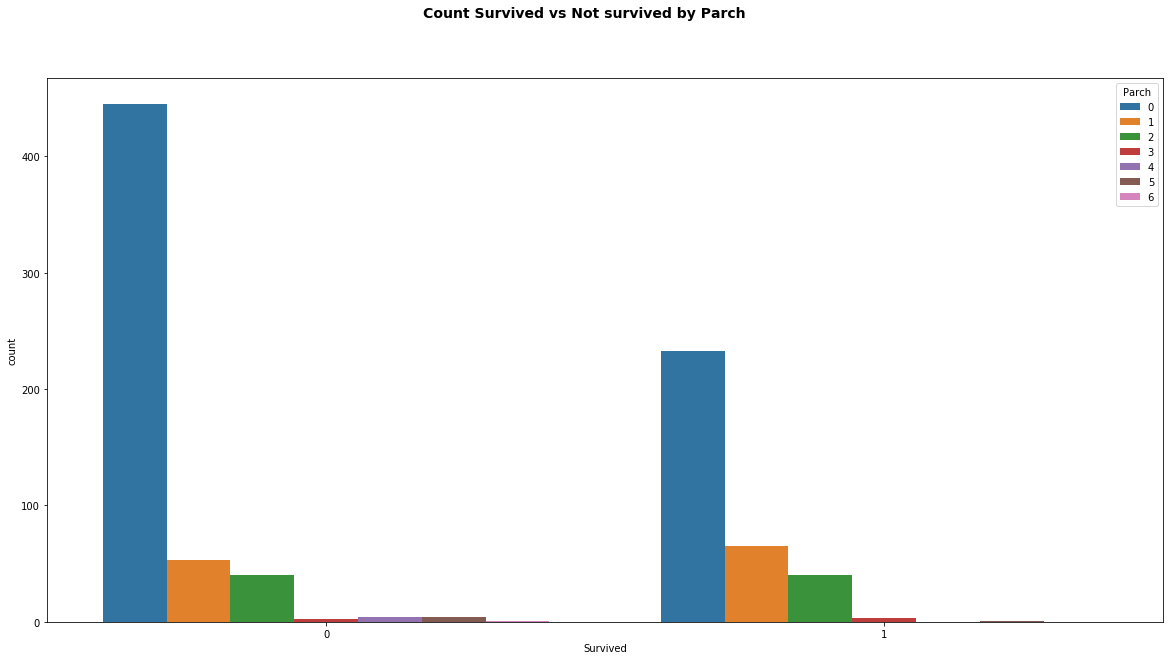

In [61]:

fig = plt.figure(figsize=(20,10))
fig.suptitle('Count Survived vs Not survived by Parch ', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
sns.countplot(df.Survived,hue=df.Parch)
plt.show()

### Let's see if we can make better use of Age . By converting numeric into Bins 



In [62]:
df.Age=df.Age.fillna(0)


In [63]:
df['Age_group']=pd.cut(x=df.Age,bins=[-1,9,19,29,39,49,59,69,79,89],labels=['0s','10s','20s','30s','40s','50s','60s','70s','80s'])

In [64]:
df[['Age','Age_group']].head()

,Age,Age_group
0,22.0,20s
1,38.0,30s
2,26.0,20s
3,35.0,30s
4,35.0,30s


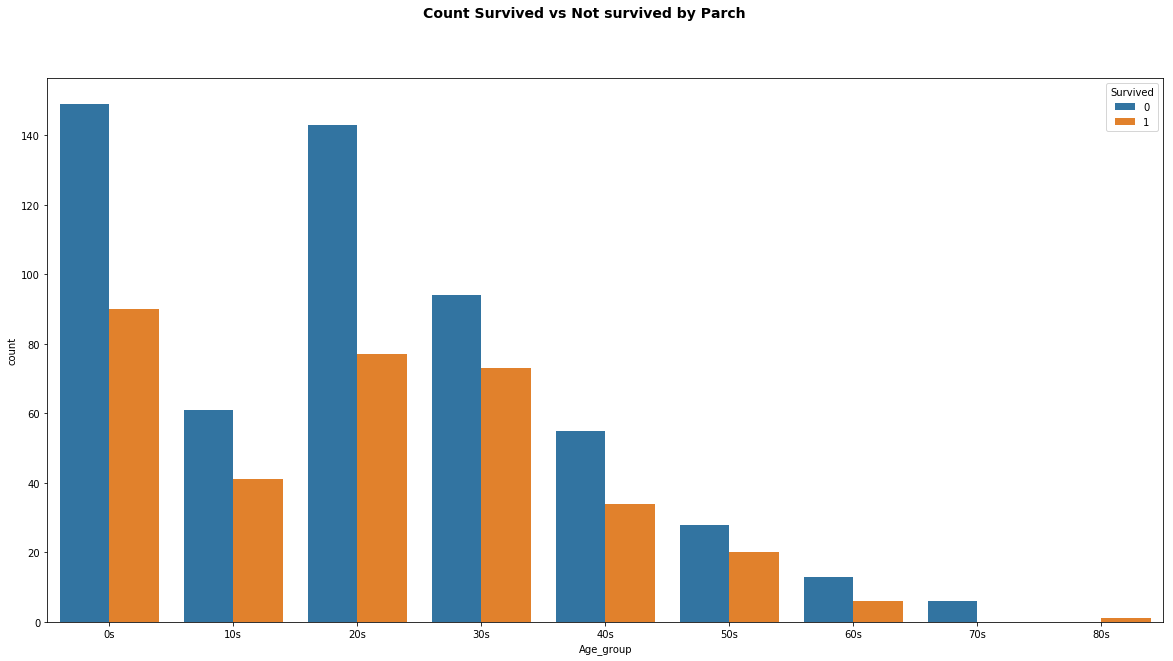

In [65]:

fig = plt.figure(figsize=(20,10))
fig.suptitle('Count Survived vs Not survived by Parch ', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax=sns.countplot(df.Age_group,hue=df.Survived)


plt.show()

In [66]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20s
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30s
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20s
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30s
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30s


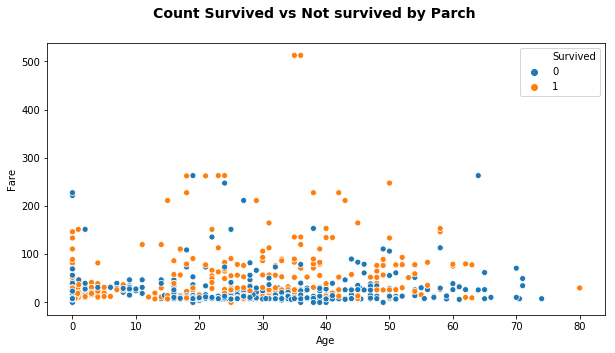

In [67]:

fig = plt.figure(figsize=(10,5))
fig.suptitle('Count Survived vs Not survived by Parch ', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
sns.scatterplot(x='Age',y='Fare',data=df,hue='Survived')
plt.show()


In [68]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Age_group      category
dtype: object

## Feature Selection 

First we need to drop features with high variance and which has almost no information like 'Passenge ID','Name'. We might as well drop out duplicate columns . As we already converted 'Age' into 'Age_Group' . 


In [69]:
df.drop(['PassengerId','Name','Age','Cabin','Ticket'],axis=1,inplace=True)

In [70]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_group
0,0,3,male,1,0,7.2500,S,20s
1,1,1,female,1,0,71.2833,C,30s
2,1,3,female,0,0,7.9250,S,20s
3,1,1,female,1,0,53.1000,S,30s
4,0,3,male,0,0,8.0500,S,30s


In [71]:
df.dtypes

Survived        int64
Pclass          int64
Sex            object
SibSp           int64
Parch           int64
Fare          float64
Embarked       object
Age_group    category
dtype: object

In [72]:
y=df.Survived.values
df.drop(['Survived'],axis=1,inplace=True)

In [73]:
df=pd.get_dummies(df)

In [74]:
df.head()

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_group_0s,Age_group_10s,Age_group_20s,Age_group_30s,Age_group_40s,Age_group_50s,Age_group_60s,Age_group_70s,Age_group_80s
0,3,1,0,7.2500,0,1,0,0,1,0,0,1,0,0,0,0,0,0
1,1,1,0,71.2833,1,0,1,0,0,0,0,0,1,0,0,0,0,0
2,3,0,0,7.9250,1,0,0,0,1,0,0,1,0,0,0,0,0,0
3,1,1,0,53.1000,1,0,0,0,1,0,0,0,1,0,0,0,0,0
4,3,0,0,8.0500,0,1,0,0,1,0,0,0,1,0,0,0,0,0


In [75]:
X=df.values

In [76]:
X.shape

(891, 18)

In [77]:
y.shape

(891,)

#### All features are numeric now . we can start building our model



In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [81]:
lr=LogisticRegression()

In [82]:
lr.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
y_pred=lr.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score,auc,f1_score,classification_report

In [85]:
print(accuracy_score(y_pred,y_test))

0.7932960893854749


In [86]:
print(f1_score(y_pred,y_test))

0.7175572519083969


In [89]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       121
           1       0.64      0.81      0.72        58

    accuracy                           0.79       179
   macro avg       0.77      0.80      0.78       179
weighted avg       0.81      0.79      0.80       179



In [90]:
import xgboost as xgb

In [91]:
xg=xgb.XGBClassifier()

In [92]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [93]:
y_pred=xg.predict(X_test)

In [94]:
print(accuracy_score(y_pred,y_test))

0.8212290502793296


In [95]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       128
           1       0.63      0.90      0.74        51

    accuracy                           0.82       179
   macro avg       0.79      0.85      0.80       179
weighted avg       0.86      0.82      0.83       179



In [96]:
print(f1_score(y_pred,y_test))

0.7419354838709677


In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rt=RandomForestClassifier()

In [99]:
rt.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
y_pred=rt.predict(X_test)

In [101]:
print(accuracy_score(y_pred,y_test))



0.8324022346368715


In [102]:
print(f1_score(y_pred,y_test))

0.7727272727272728


In [103]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       120
           1       0.70      0.86      0.77        59

    accuracy                           0.83       179
   macro avg       0.81      0.84      0.82       179
weighted avg       0.85      0.83      0.84       179



> Seems XGBoost is overall working better. Lets tune parameters for better accuracy . 

In [112]:
param_grid = {
      
        'max_depth': [3,4,6, 10],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100,200,500]}

In [113]:
import time

In [114]:


rs_clf = RandomizedSearchCV(xg, param_grid, n_iter=20,
                            n_jobs=1, verbose=2, cv=2,
                            scoring='neg_log_loss', refit=False, random_state=42)
print("Randomized search..")
search_time_start = time.time()
rs_clf.fit(X_train, y_train)
print("Randomized search time:", time.time() - search_time_start)

best_score = rs_clf.best_score_
best_params = rs_clf.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Randomized search..
Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] subsample=0.9, reg_lambda=100.0, n_estimators=100, min_child_weight=5.0, max_depth=3, learning_rate=0, gamma=0.5, colsample_bytree=0.4, colsample_bylevel=0.9 
[CV]  subsample=0.9, reg_lambda=100.0, n_estimators=100, min_child_weight=5.0, max_depth=3, learning_rate=0, gamma=0.5, colsample_bytree=0.4, colsample_bylevel=0.9, total=   0.0s
[CV] subsample=0.9, reg_lambda=100.0, n_estimators=100, min_child_weight=5.0, max_depth=3, learning_rate=0, gamma=0.5, colsample_bytree=0.4, colsample_bylevel=0.9 
[CV]  subsample=0.9, reg_lambda=100.0, n_estimators=100, min_child_weight=5.0, max_depth=3, learning_rate=0, gamma=0.5, colsample_bytree=0.4, colsample_bylevel=0.9, total=   0.0s
[CV] subsample=0.8, reg_lambda=5.0, n_estimators=200, min_child_weight=0.5, max_depth=3, learning_rate=0.001, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=1.0 
[CV]  subsample=0.8, reg_lambda=5.0, n_estimators=200, min_child_we

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  subsample=0.5, reg_lambda=0.1, n_estimators=500, min_child_weight=10.0, max_depth=10, learning_rate=0.01, gamma=1.0, colsample_bytree=0.4, colsample_bylevel=0.9, total=   0.1s
[CV] subsample=0.5, reg_lambda=0.1, n_estimators=500, min_child_weight=10.0, max_depth=10, learning_rate=0.01, gamma=1.0, colsample_bytree=0.4, colsample_bylevel=0.9 
[CV]  subsample=0.5, reg_lambda=0.1, n_estimators=500, min_child_weight=10.0, max_depth=10, learning_rate=0.01, gamma=1.0, colsample_bytree=0.4, colsample_bylevel=0.9, total=   0.1s
[CV] subsample=0.9, reg_lambda=10.0, n_estimators=500, min_child_weight=1.0, max_depth=3, learning_rate=0.2, gamma=1.0, colsample_bytree=0.6, colsample_bylevel=0.9 
[CV]  subsample=0.9, reg_lambda=10.0, n_estimators=500, min_child_weight=1.0, max_depth=3, learning_rate=0.2, gamma=1.0, colsample_bytree=0.6, colsample_bylevel=0.9, total=   0.1s
[CV] subsample=0.9, reg_lambda=10.0, n_estimators=500, min_child_weight=1.0, max_depth=3, learning_rate=0.2, gamma=1.0, cols

D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:2174: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:2174: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)


[CV]  subsample=0.5, reg_lambda=0.1, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.001, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.4, total=   0.0s
[CV] subsample=0.5, reg_lambda=0.1, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.001, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.4 
[CV]  subsample=0.5, reg_lambda=0.1, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.001, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.4, total=   0.0s
[CV] subsample=0.5, reg_lambda=5.0, n_estimators=200, min_child_weight=10.0, max_depth=4, learning_rate=0.001, gamma=1.0, colsample_bytree=0.8, colsample_bylevel=0.5 
[CV]  subsample=0.5, reg_lambda=5.0, n_estimators=200, min_child_weight=10.0, max_depth=4, learning_rate=0.001, gamma=1.0, colsample_bytree=0.8, colsample_bylevel=0.5, total=   0.0s
[CV] subsample=0.5, reg_lambda=5.0, n_estimators=200, min_child_weight=10.0, max_depth=4, learning_rate=0.001, gamma=1.0, c

[CV] subsample=0.6, reg_lambda=50.0, n_estimators=500, min_child_weight=7.0, max_depth=6, learning_rate=0.2, gamma=0.5, colsample_bytree=0.9, colsample_bylevel=0.5 
[CV]  subsample=0.6, reg_lambda=50.0, n_estimators=500, min_child_weight=7.0, max_depth=6, learning_rate=0.2, gamma=0.5, colsample_bytree=0.9, colsample_bylevel=0.5, total=   0.1s
[CV] subsample=0.6, reg_lambda=1.0, n_estimators=200, min_child_weight=10.0, max_depth=6, learning_rate=0.001, gamma=0, colsample_bytree=0.5, colsample_bylevel=0.7 
[CV]  subsample=0.6, reg_lambda=1.0, n_estimators=200, min_child_weight=10.0, max_depth=6, learning_rate=0.001, gamma=0, colsample_bytree=0.5, colsample_bylevel=0.7, total=   0.0s
[CV] subsample=0.6, reg_lambda=1.0, n_estimators=200, min_child_weight=10.0, max_depth=6, learning_rate=0.001, gamma=0, colsample_bytree=0.5, colsample_bylevel=0.7 
[CV]  subsample=0.6, reg_lambda=1.0, n_estimators=200, min_child_weight=10.0, max_depth=6, learning_rate=0.001, gamma=0, colsample_bytree=0.5, co

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    2.0s finished


In [115]:


# creating XGboost with best parameters

xgclf=xgb.XGBClassifier(colsample_bylevel=0.4,colsample_bytree=0.9,gamma=0.25,learning_rate=0.01,max_depth=3,min_child_weight=1.0,n_estimators=500,reg_lambda=0.1,subsample=0.6)

In [ ]:
xgclf.fit(X_train,)